## Grafs 23/24 - Sheet 2 - Due 15 October 2023


# Graphs in SageMath 


SageMath is a very powerful tool for doing mathematics in a Python based environment. See <https://www.sagemath.org/> for installation guides, online interfaces, and the documentation. Check in particular <https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/generic_graph.html> for the documentation of many graph related features.

In SageMath many important graphs are predefined. Also graphs can be created from scratch and modified by adding and deleting vertices and edges. Also many methods for graphs exist in SageMath, e.g., plotting a graph or an isomorphism test. In the following we generate three graphs with the same number of edges and check if they are isomorphic.

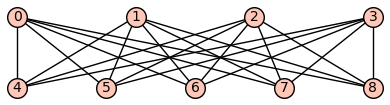

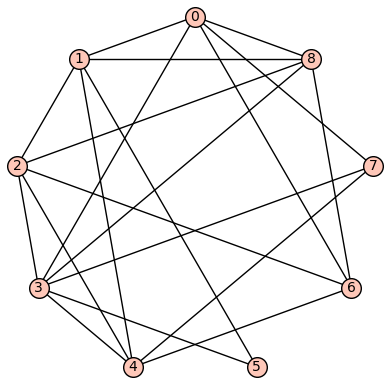

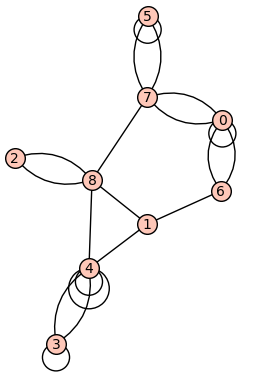

In [43]:
G1=graphs.CompleteBipartiteGraph(4,5)
G2=graphs.CompleteGraph(G1.order())
G3=Graph(multiedges=True,loops=True)#by default graphs are simple in sage, but multigraphs can be handled
#Graph() initializes an empty graph
#Graph(n) initializes a graph with vertices {0,1,...,n-1} and no edges
G1.show()

while G2.size()>G1.size():#G2 and G1 always have the same number of vertices
    G2.delete_edge(list(G2.edges())[randint(0,G2.size()-1)])
G2.show()

if G2.is_isomorphic(G1):
    print("this was unlikely")
while G3.size()<G1.size():#G3 and G1 dont always have the same number of vertices
    G3.add_edge((randint(0,G1.order()-1),randint(0,G1.order()-1)))
    # G.add_edge((i,j)) adds the edges (i,j) to G (and the vertices i and j if they were not already present in the vertices of G)
G3.show()

if G2.is_isomorphic(G3) or G1.is_isomorphic(G3):
    print("this was even more unlikely")


Use the tabulation in jupyter to get suggestions for completing. For example, type `G2.s` and `G2.si` and hit `TAB`.

You can access the built-in documentation of a function by using the question mark.

In [2]:
G2.size?

Signature:      G2.size()
Docstring:     
   Return the number of edges.

   Note that "num_edges()" also returns the number of edges in G.

   EXAMPLES:

      sage: G = graphs.PetersenGraph()
      sage: G.size()
      15
Init docstring: Initialize self.  See help(type(self)) for accurate signature.
File:           /private/var/tmp/sage-10.1-current/local/var/lib/sage/venv-python3.11.1/lib/python3.11/site-packages/sage/graphs/generic_graph.py
Type:           method


Example of a function that builds the cyclic graph with n vertices.

In [3]:
def cyclic_graph(n):
    G=Graph()
    for i in range(n):
        G.add_edge((i, (i+1)%n))
    return G

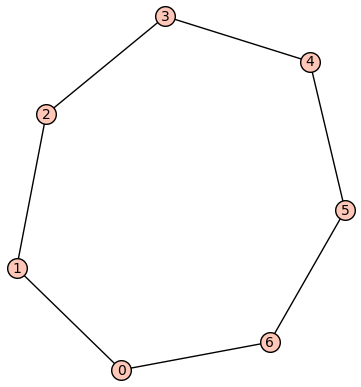

In [ ]:
cyclic_graph(7).show()

## Exercise 0
Find out how to obtain the adjacency matrix of a graph in SageMath and how to multiply matrices and compute their powers. Recall that the $k$-th power of the adjacency matrix encodes the number of walks of length $k$ between every pair of vertices of the graph (shown in exercise sessions). Use this to write a function `number_of_k_walks(G,k,i,j)` that returns the number of walks of length `k` between the vertices `i` and `j` of the graph `G`. 

In [5]:
def number_of_k_walks(G,k,i,j):
    # Complete here the code for the exercise
    adjacency_matrix = G.adjacency_matrix()
    
    kth_power_of_AM = adjacency_matrix^k
    
    nwalks = kth_power_of_AM[i][j]
    
    return nwalks 

In [6]:
G=graphs.CompleteGraph(5)
number_of_k_walks(G,5,2,3)

205

## Exercise 1
For integers $k,n$ such that $1\leq k<\frac{n}{2}$ the _Generalized Petersen Graph_ $G(n,k)$ has $2n$ vertices $\{u_0, \ldots, u_{n-1},v_0, \ldots, v_{n-1}\}$ and edges $\{u_iu_{i+1}, u_iv_i, v_iv_{i+k} \mid 0 \le i \le n-1 \}$, where subscripts are read modulo $n$. Write a function `def GenPet(n,k)`, that given `k` and `n` verifies if the parameters are correct and then returns $G(n,k)$. 

Edit your previous function to make a function `def GenPet(n,k,check=False)` with an input argument `check` that has a default value `False`. When `check` is `True`, your algorithm should moreover check if the produced graph is isomorphic to `graphs.GeneralizedPetersenGraph(n,k)` using the sage function `G.is_isomorphic(H)`. See the [Sage documentation](https://doc.sagemath.org/html/en/tutorial/tour_help.html?highlight=completion#functions-indentation-and-counting) to learn more about default values in function inputs.

Plot $G(7,2)$ and $G(4,1)$.

In [9]:
def GenPet(n,k,check=False):
    G=Graph(2 * n)
    
    # Complete here the code for the exercise
    if not 1 <= k < n / 2 :
        raise ValueError("Invalid value of k and n. 1 <= k < n/2")
    
    for i in range(n) :
        G.add_edges([(i, (i + 1) % n), (i, i + n), (i + n, (i + k) % n + n)])
        
    if check :
        if not G.is_isomorphic(graphs.GeneralizedPetersenGraph(n, k)) :
            raise Exception("Check failed.")
    
    return G

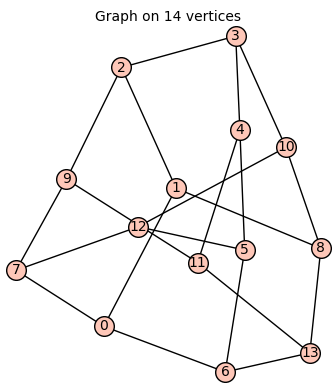

In [10]:
GenPet(7,2,True)

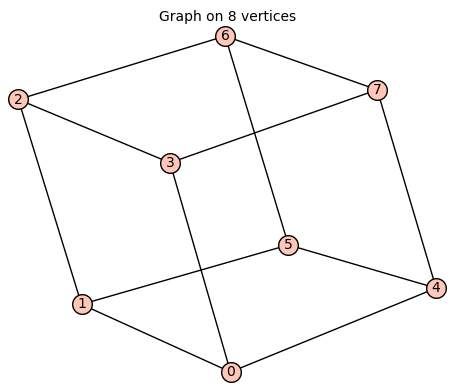

In [11]:
GenPet(4,1)

## Graphs with vertex labels
The names of vertices do not have to be numbers. In theory they can be just any kind of object. However, in SageMath the type of a vertex has to be immutable. This is, it cannot be a `list` or a `set`, but it can be a character, a string, or a `Set`. The later type is of SageMath (not the python data type) and has such nice features as having a method to go through all its subsets (of given size). 

In [12]:
s='Hell'
s+='o'
print(s)

l=list(s)
print(l)

S=Set(l)
print(S)

U=S.difference({'o'})
print(U)

print('o' in S)
print('o' in U)

m=list(S)
print(m)

print("".join(m))

Hello
['H', 'e', 'l', 'l', 'o']
{'H', 'o', 'e', 'l'}
{'H', 'e', 'l'}
True
False
['H', 'o', 'e', 'l']
Hoel


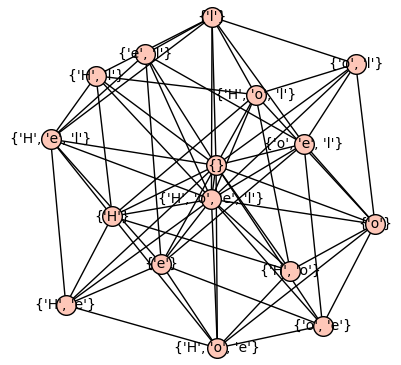

[15, 15, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6]


In [13]:
G=Graph()
for T in Subsets(S):#write Subsets(S,k) for all k-subsets and just Subsets(n) if S={1,...,n} 
    for U in Subsets(T):
        if U!=T:
            G.add_edge(U,T)
G.show()
print(sorted(G.degree(),reverse=True))

## Exercise 2
For integers $k,n$ such that $0\leq k\leq n$ the _Kneser graph_ $K(n,k)$ is the graph whose vertices correspond to the $k$-element subsets of a set of $n$ elements, and where two vertices are adjacent if and only if the two corresponding sets are disjoint. Write a function `Kneser(n,k,check=False)` that given `n` and `k` verifies if the parameters are correct and then returns $K(n,k)$. Optionally the function should check if the produced graph is isomorphic to `graphs.KneserGraph(n,k)` depending on the input argument `check`, with default value `False`.
Plot $K(5,2)$ and $K(4,1)$.

In [59]:
def Kneser(n,k,check=False):
    G=Graph()
    # Complete here the code for the exercise
    if 0 > n or 0 > k or k > n :
        raise ValueError("Invalid values of k and n.")
        
    S = Set(range(1, n+1))
    for s in Subsets(S, k) :
        G.add_vertex(s)
        for t in Subsets(S.difference(s), k) :
            if s != t :
                G.add_edge((t, s))
    if check :    
        if not G.is_isomorphic(graphs.KneserGraph(n,k)) :
            raise Exception("Check failed.")
    
    return G

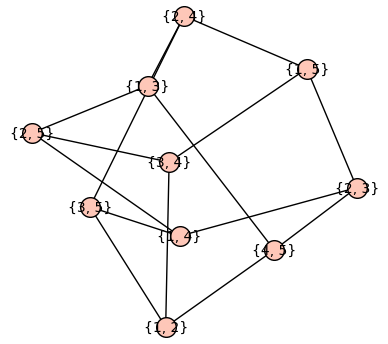

In [60]:
Kneser(5,2, check=True).show()

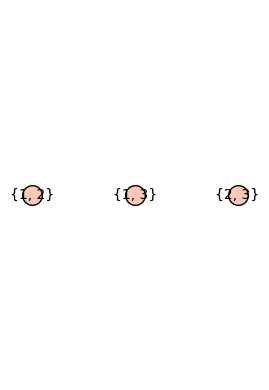

In [61]:
graphs.KneserGraph(3,2).show()

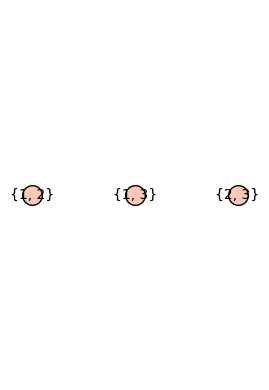

In [41]:
Kneser(3,2, check=True).show()

## Exercise 3

Write a function `Stov(S,n)` that translates a subset $S$ of $\{1, \ldots, n\}$ into the string $v_S$ of length $n$ whose $i$th entry is $1$ if $i\in S$ and $0$ if $i\notin S$.

In [1]:
def Stov(S,n):
    v=''
    
    # Complete here the code for the exercise
    for i in range(1, n+1):
        v += "1" if i in S else "0"  
        
    return v

In [2]:
S1 = Set([1, 2])
S2 = Set([1, 3, 5])

print(Stov(S1, 3))
print(Stov(S2, 6))

110
101010


For a positive integer $n$ the _hypercube_ $Q_n$ is the graph whose vertices correspond to the $(0,1)$-vectors of length $n$ where two vertices are adjacent if and only if the two corresponding vectors differ in exactly one entry. Write a function `Q(n)`, that given $n$ returns $Q_n$. You can use that the $(0,1)$-vectors of length $n$ correspond to the subsets of $\{1, \ldots, n\}$. Use the function `Stov` to label the vertices with $0/1$-strings.

In [9]:
#first version using Subsets
def Q(n):
    Q=Graph()
    
    # Complete here the code for the exercise
    S = Set(range(1, n+1))
    
    for s in Subsets(S):
        v = Stov(s, n)
        Q.add_vertex(v)
        
        for idx, c in enumerate(v) :
            u = list(v)
            u[idx] = "0" if c == "1" else "1"
            
            Q.add_edge((v, "".join(u)))

    return Q

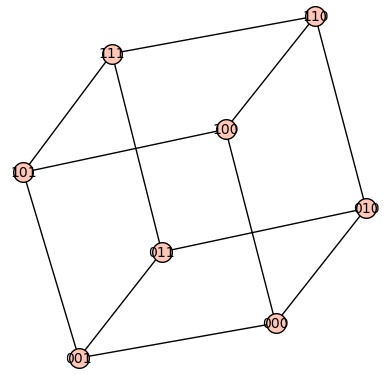

In [14]:
Q(3).show()

Write another function `doubling(G)` that given a graph $G$ constructs its _doubling_, this is: it takes two disjoint copies of $G$ and connects corresponding vertices with an edge. Use this to make another function `recQ(n)` to construct $Q_n$ recursively. Show the results of both functions for $n=3$.

In [33]:
def doubling(G):#specific to graphs whose vertices are labelled with strings
    H=Graph()
    
    # Complete here the code for the exercise
    Q = G.copy()
    G.relabel(perm={ v: "0" + v for v in G.vertices() })
    Q.relabel(perm={ v: "1" + v for v in Q.vertices() })
    
    H = G.union(Q)
    H.add_edges([ (v, "1" + v[1:]) for v in G.vertices() ])
    
    return H
        
def recQ(n):
    
    # Complete here the code for the exercise
    if n == 1 :
        G = Graph()
        G.add_edge(("0", "1"))
        return G
    else :
        G = recQ(n-1)
        return doubling(G)

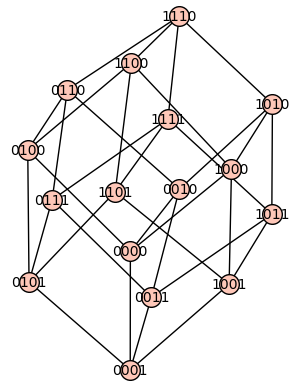

True

In [32]:
G = Q(3)
H = doubling(G)
H.show()
H.is_isomorphic(Q(4))

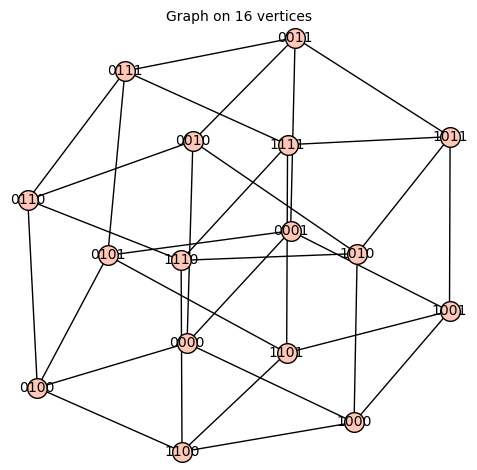

In [35]:
recQ(4)

Finally, use the function `compare_cubes(n)` to compare if the results of your two function are _equal_ to `graphs.CubeGraph(n)`, as well as their runtimes for $n=10$.

In [36]:
def compare_cubes(n):
    import time
    start_time = time.time()
    G1=Q(n)
    time1=time.time() - start_time
    start_time = time.time()
    G2=recQ(n)
    time2=time.time() - start_time
    start_time = time.time()
    G3=graphs.CubeGraph(n)
    time3=time.time() - start_time
    print(G1==G2)
    print(G2==G3)
    print("direct:", time1,"doubling:", time2, "SageMath",time3)

In [37]:
compare_cubes(10)

True
True
direct: 0.07479596138000488 doubling: 0.01402592658996582 SageMath 0.041848182678222656


## Isomorphisms
Sometimes if your graphs have some complicated vertex labels, you might want to get rid of them. This can be done easily with the relabel method.

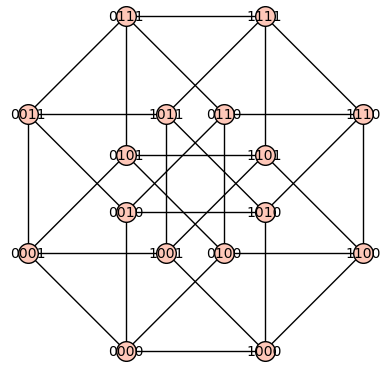

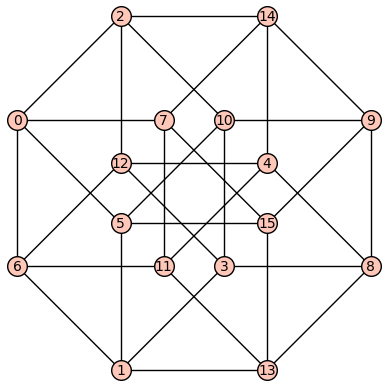

In [38]:
G=graphs.CubeGraph(4)
H=G.copy()#note that you have to take a copy in order to not work on G
H.relabel()
G.show()
H.show()

Another useful tool for the next exercise are permutations in SageMath. One can get an iterator over all permutations of a given list.

In [39]:
l=[3,1,2,5,4]
for p in Permutations(l):#print all permutations that fix the first entry
    if p[0]==3:
        print(p)

[3, 1, 2, 5, 4]
[3, 1, 2, 4, 5]
[3, 1, 5, 2, 4]
[3, 1, 5, 4, 2]
[3, 1, 4, 2, 5]
[3, 1, 4, 5, 2]
[3, 2, 1, 5, 4]
[3, 2, 1, 4, 5]
[3, 2, 5, 1, 4]
[3, 2, 5, 4, 1]
[3, 2, 4, 1, 5]
[3, 2, 4, 5, 1]
[3, 5, 1, 2, 4]
[3, 5, 1, 4, 2]
[3, 5, 2, 1, 4]
[3, 5, 2, 4, 1]
[3, 5, 4, 1, 2]
[3, 5, 4, 2, 1]
[3, 4, 1, 2, 5]
[3, 4, 1, 5, 2]
[3, 4, 2, 1, 5]
[3, 4, 2, 5, 1]
[3, 4, 5, 1, 2]
[3, 4, 5, 2, 1]


# Exercise 4
Write an isomorphism test `are_isomorphic(G,H,count=False)` that checks whether the graphs `G` and `H` are isomorphic. (It does not need to be optimal, it can be by a brute force check on permutations. Nevertheless, do `break` the test of a permutation once you already know it is not inducing an isomorphism.) Optionally, if `count==True` it should return the number of isomorphisms from `G` to `H`.

In [40]:
def are_isomorphic(G,H,count=False):   
      
    # Complete here the code for the exercise
    vertices = G.vertices()
    num_isomorphisms = 0
    for perm in Permutations(vertices):
        is_isomorphic = True
        for v, v_perm in zip(vertices, perm):
            if G.neighbors(v) != H.neighbors(v_perm):
                is_isomorphic = False
                break
        if is_isomorphic:
            num_isomorphisms += 1
            if not count:
                break
    if count:
        return num_isomorphisms
    else:
        return num_isomorphisms > 0
    

Use the function below to compare you algorithm with the SageMath implementation. Given two graphs `G` and `H` it returns the runtime of your algorithm and of the implementation of SageMath to check if they are isomorphic. Moreover, it gives a warning message if both algorithms give different results.
Try the function on the graphs `G1`,`G2`,`G3` from the the beginning of the sheet.

In [41]:
def compare_isotest(G,H):
    import time
    start_time = time.time()
    result1=are_isomorphic(G,H)
    time1=time.time() - start_time
    start_time = time.time()
    result2=G.is_isomorphic(H)
    time2=time.time() - start_time
    if result2!=result1:
        print("isomorphism is not working properly")
    return time1, time2

In [44]:
print(compare_isotest(G1,G2))
print(compare_isotest(G2,G3))
print(compare_isotest(G1,G3))

(0.708956241607666, 7.605552673339844e-05)
(0.6419329643249512, 4.506111145019531e-05)
(0.6481966972351074, 3.814697265625e-05)


# Exercise 5
Write a function `is_multigraphic(d)` that tests if the given sequence is a degree sequence of a multigraph and returns a multigraph with this degree sequence if possible. If no such multigraph exists, the function should return `None`.

In [70]:
def is_multigraphic(d):
      
    # Complete here the code for the exercise
    G = Graph(
        multiedges=True,
        loops=True
    )
    
    prev = None
    for idx, v in enumerate(d) :
        if v % 2 == 1 :
            d[idx] -= 1
            if prev is None :
                prev = idx
            else :
                G.add_edge((prev, idx))
                prev = None
    if prev is not None :
        return None
    
    for idx, v in enumerate(d) :
        for _ in range(v/2) : 
            G.add_edge((idx, idx))
    
    return G


[6, 5, 5, 4, 3, 2, 1]


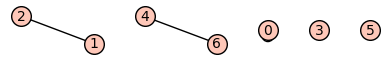

[6, 5, 5, 4, 3, 2, 1]
[6, 5, 4, 4, 3, 2, 1]
None


In [71]:
d=[6,5,5,4,3,2,1]
print(d)
G=is_multigraphic(d)
G.show()
print(G.degree_sequence())

d=[6,5,4,4,3,2,1]
print(d)
G=is_multigraphic(d)
print(G)

# Exercise 6
Write a function `is_graphic(d)` that tests if the given sequence is a degree sequence of a simple graph and returns such graph if possible. If no such multigraph exists, the function should return `None`. 

Tip: You can use the method `L.sort(reverse=True)` to sort a list `L` in a non-increasing way.

In [105]:
def is_graphic(d):
      
    # Complete here the code for the exercise
    
    d.sort(reverse=True)
    G = Graph()
    q = [(i, v) for i, v in enumerate(d)]
    while (len(q) != 1) :
        if len(q) < q[0][1] + 1 :
            return None
        edges = [(q[0][0], v[0]) for v in q[1:q[0][1]+1]]
        G.add_edges(edges)
        new_q = []
        for i, v in q[1:q[0][1]+1] :
            if v == 0 :
                return None
            new_q += [(i, v - 1)]
        new_q += q[q[0][1]+1:]
        new_q.sort(reverse=True, key=lambda a: a[1])
        q = new_q
        
    if q[0][1] != 0 :
        return None
    else:
        return G
            
        
    
    
    

[6, 5, 3, 2, 2, 1, 1, 1, 1]


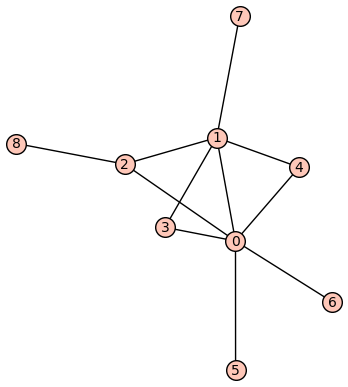

[6, 5, 5, 2, 2, 1, 1, 1, 1]
None


In [106]:
d=[6,5,3,2,2,1,1,1,1]
print(d)
G=is_graphic(d)
G.show()

d=[6,5,5,2,2,1,1,1,1]
print(d)
G=is_graphic(d)
print(G)

[4, 3, 3, 2, 2]


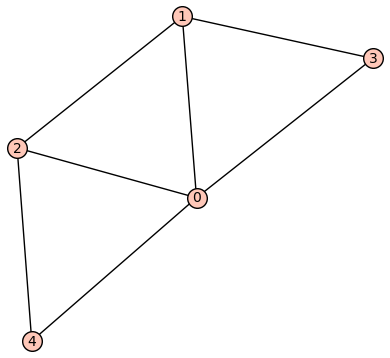

[5, 5, 5, 5, 5, 5]


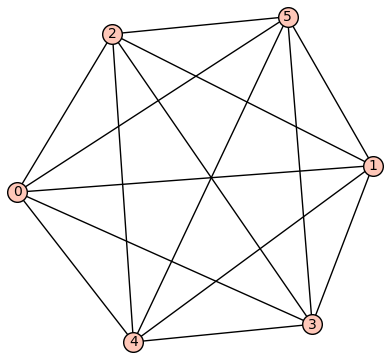

[5, 5, 4, 4, 3, 2, 1]


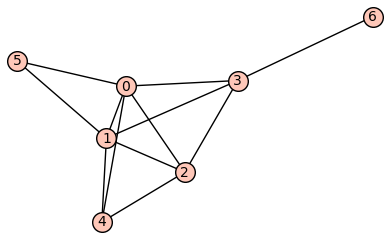

[6, 5, 3, 3, 3, 2, 2]


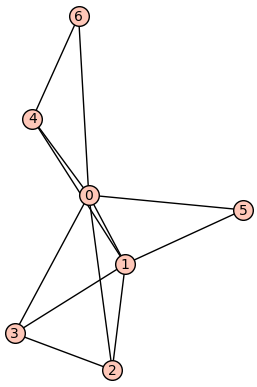

[5, 4, 4, 4, 3, 2, 2]


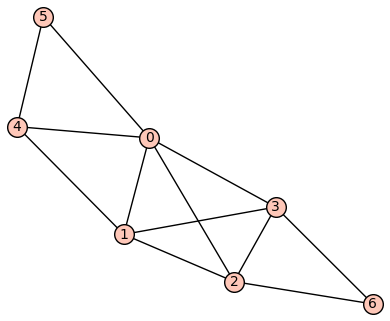

[6, 5, 4, 4, 3, 3, 2, 1]


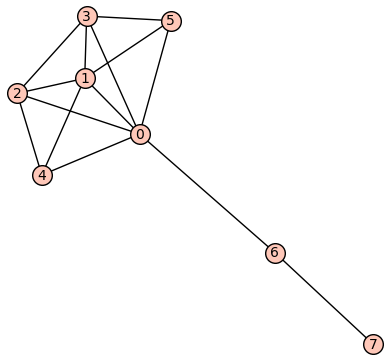

In [107]:
d=[4,3,3,2,2]
print(d)
G=is_graphic(d)
G.show()

d=[5,5,5,5,5,5]
print(d)
G=is_graphic(d)
G.show()

d=[5,5,4,4,3,2,1]
print(d)
G=is_graphic(d)
G.show()

d=[6,5,3,3,3,2,2]
print(d)
G=is_graphic(d)
G.show()

d=[5,4,4,4,3,2,2]
print(d)
G=is_graphic(d)
G.show()

d=[6,5,4,4,3,3,2,1]
print(d)
G=is_graphic(d)
G.show()